<a href="https://colab.research.google.com/github/MauroTalamantes/SalPimientaFiltroKernelSSIMPSNR/blob/main/SalPimientaFiltroKernelSSIMPSNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
img_bgr = cv2.imread('/content/drive/MyDrive/Colab Notebooks/0_0.tif')

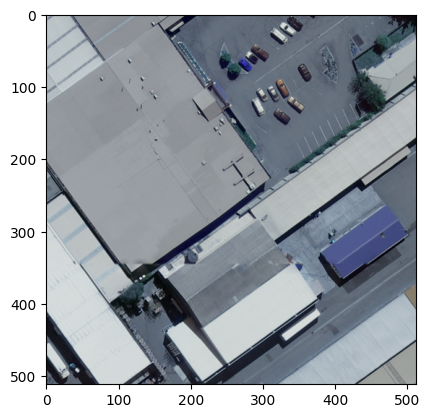

In [ ]:
plt.imshow(img_bgr)
plt.show()

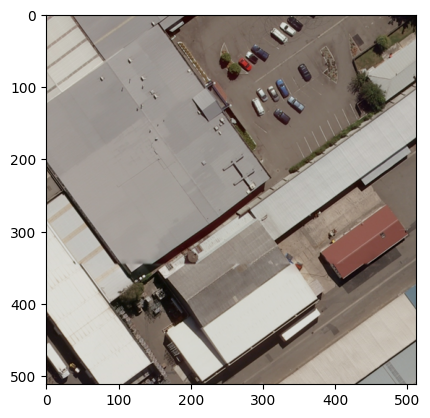

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Función para añadir ruido sal y pimienta

def add_salt_pepper_noise(image, amount):
  noisy = random_noise(image, mode = 's&p', amount = amount)
  noisy = (255 * noisy).astype(np.uint8)
  return noisy

In [ ]:
# Función para aplicar filtros de mediana con diferentes tamaños

def apply_median_filter(image, kernel_size = [3, 7, 11]):
  return [cv2.medianBlur(image, ksize) for ksize in kernel_size]

In [ ]:
# Configurar niveles de ruido y tamaños de kernel

noise_levels = [0.05, 0.17, 0.30] # 5% de los píxeles se verán afectados | 17% tendrán ruido | 30% (ruido alto)
filter_sizes = [3, 7, 11] # 3x3, 7x7, 11x11

# 3x3, 7x7, 11x11 - 5%
# 3x3, 7x7, 11x11 - 17%
# 3x3, 7x7, 11x11 - 30%

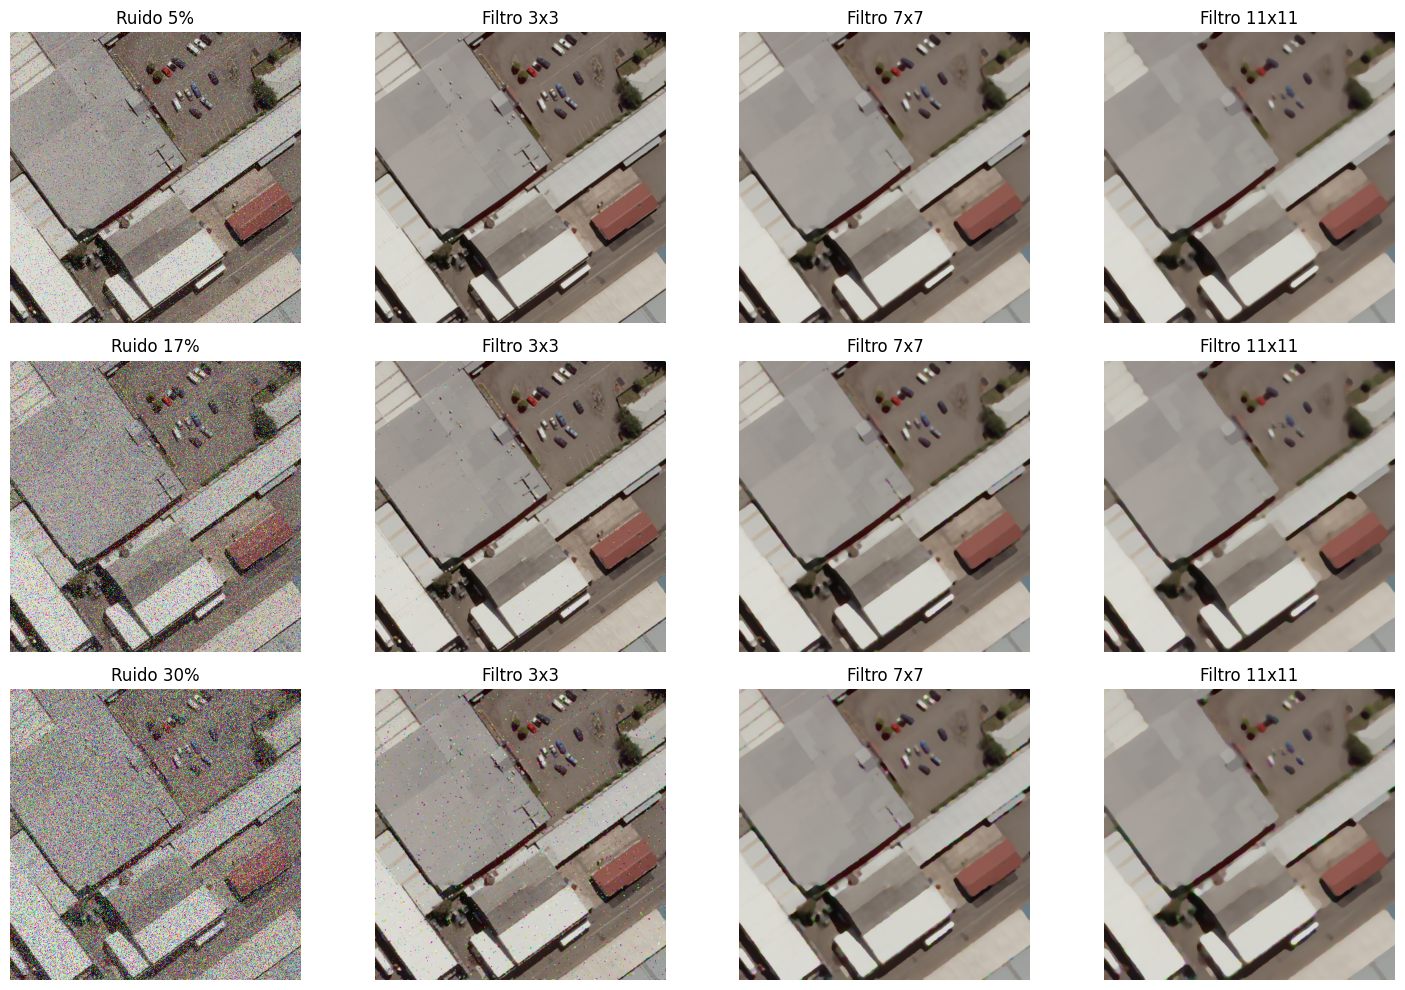

In [ ]:
# Visualización
fig, axs = plt.subplots(len(noise_levels), len(filter_sizes)+1, figsize=(15,10))
for i, noise_levels in enumerate(noise_levels):
  noisy_img = add_salt_pepper_noise(img_rgb, noise_levels)

  axs[i, 0].imshow(noisy_img)
  axs[i, 0].set_title(f"Ruido {int(noise_levels*100)}%")
  axs[i, 0].axis('off')

  filtered_imgs = apply_median_filter(noisy_img, filter_sizes)
  for j, filtered in enumerate(filtered_imgs):
      axs[i, j+1].imshow(filtered)
      axs[i, j+1].set_title(f"Filtro {filter_sizes[j]}x{filter_sizes[j]}")
      axs[i, j+1].axis('off')

plt.tight_layout()
plt.show()

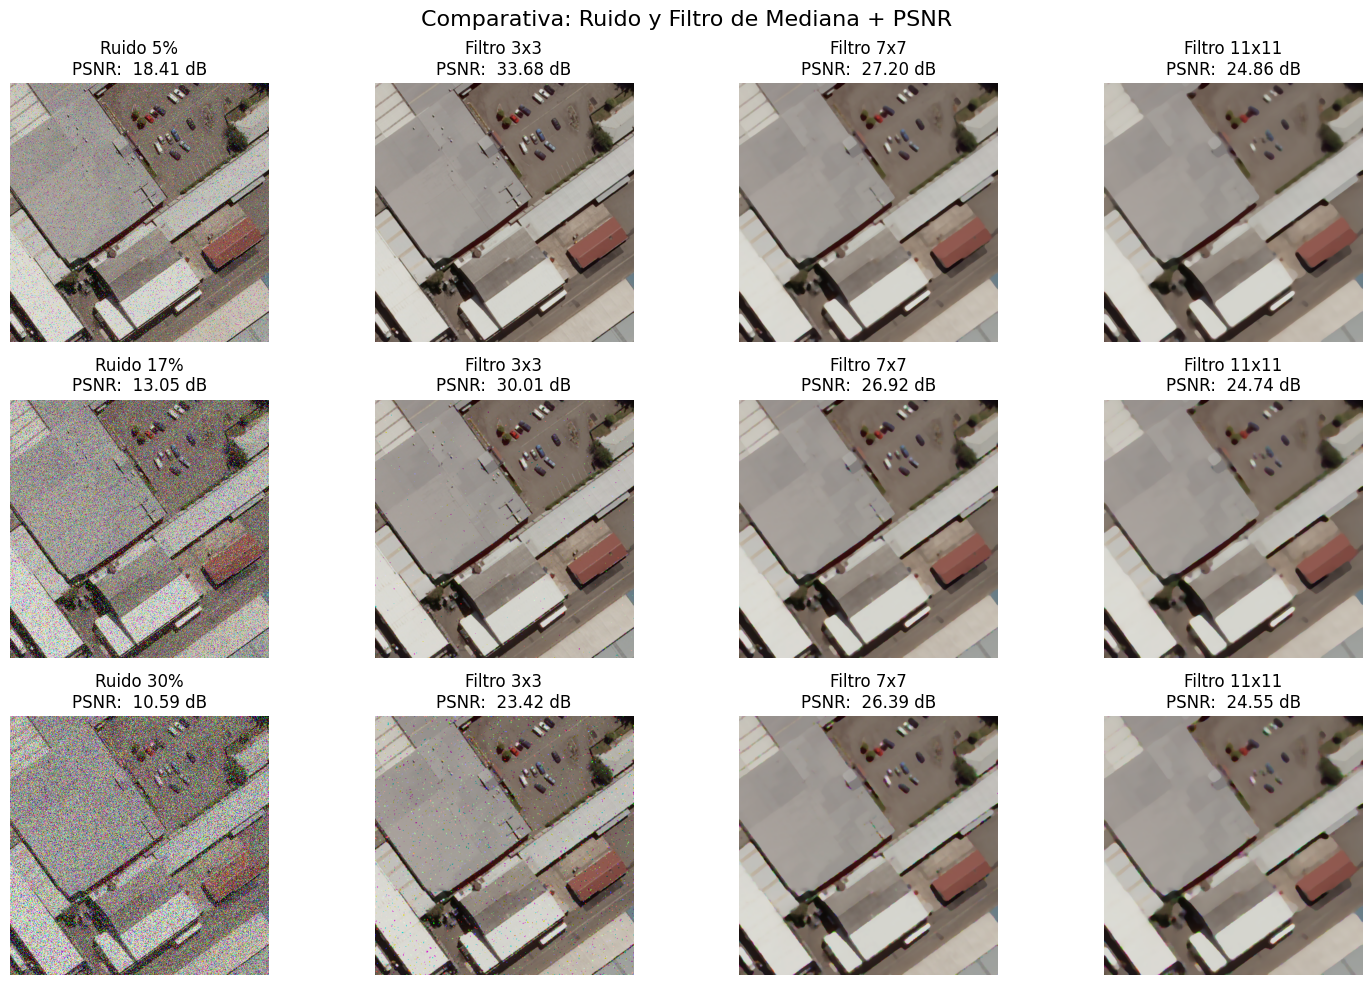

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

# Funciones
# Agregar ruido sal y pimienta
def add_salt_pepper_noise(image, amount):
  noisy = random_noise(image, mode = 's&p', amount = amount)
  noisy = (255 * noisy).astype(np.uint8)
  return noisy

# Función para aplicar filtros de mediana con diferentes tamaños
def apply_median_filter(image, kernel_size = [3, 7, 11]):
  return [cv2.medianBlur(image, ksize) for ksize in kernel_size]

# Calcular PSNR
def calcular_psnr(img1, img2):
  mse = np.mean((img1.astype(np.float64)- img2.astype(np.float64))**2)
  if mse == 0:
    return float('inf')
  return 10* np.log10((255 ** 2)/mse)


# Configuración
noise_levels = [0.05, 0.17, 0.30]
filter_sizes = [3, 7, 11]

# Visualización

# Visualización
fig, axs = plt.subplots(len(noise_levels), len(filter_sizes)+1, figsize=(15,10))

for i, noise_levels in enumerate(noise_levels):
  noisy_img = add_salt_pepper_noise(img_rgb, noise_levels)
  psnr_noisy = calcular_psnr(img_rgb, noisy_img)

  axs[i, 0].imshow(noisy_img)
  axs[i, 0].set_title(f"Ruido {int(noise_levels*100)}%\nPSNR: {psnr_noisy: .2f} dB")
  axs[i, 0].axis('off')

  filtered_imgs = apply_median_filter(noisy_img, filter_sizes)
  for j, filtered in enumerate(filtered_imgs):
      psnr_filtered = calcular_psnr(img_rgb, filtered)
      axs[i, j+1].imshow(filtered)
      axs[i, j+1].set_title(f"Filtro {filter_sizes[j]}x{filter_sizes[j]}\nPSNR: {psnr_filtered: .2f} dB")
      axs[i, j+1].axis('off')

plt.suptitle("Comparativa: Ruido y Filtro de Mediana + PSNR", fontsize = 16)
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Función para ruido sal y primienta

def add_salt_pepper_noise(image, amount):
  noisy = image.copy()
  total_pixels = image.shape[0]*image.shape[1]

  # Añadir sal (blanco)
  num_salt = int(amount * total_pixels / 2)
  coords = [np.random.randint(0, i - 1, num_salt) for i in image.shape[:2]]
  noisy[coords[0], coords[1]] = 255

  # Añadir pimienta (negros)
  num_pepper = int(amount * total_pixels / 2)
  coords = [np.random.randint(0, i - 1, num_pepper) for i in image.shape[:2]]
  noisy[coords[0], coords[1]] = 0

  return noisy

# Configuración
noise_levels = [0.05, 0.17, 0.30]
filter_sizes = [3, 7, 11]

# Calcular SSIM

print("---------- R E S U L T A D O S ----------")
for noise in noise_levels:
  noisy = add_salt_pepper_noise(img_rgb, noise)
  print(f"\n Ruido {int(noise *100)}%:")
  for k in filter_sizes:
    filtered = cv2.medianBlur(noisy, k)
    ssim_score = ssim(img_rgb, filtered, channel_axis=-1)
    print(f"Filtro {k}x{k} - SSIM: {ssim_score:.4f}")

---------- R E S U L T A D O S ----------

 Ruido 5%:
Filtro 3x3 - SSIM: 0.9599
Filtro 7x7 - SSIM: 0.8632
Filtro 11x11 - SSIM: 0.8072

 Ruido 17%:
Filtro 3x3 - SSIM: 0.9334
Filtro 7x7 - SSIM: 0.8587
Filtro 11x11 - SSIM: 0.8040

 Ruido 30%:
Filtro 3x3 - SSIM: 0.8220
Filtro 7x7 - SSIM: 0.8534
Filtro 11x11 - SSIM: 0.8009
